# Project 4A: Aircraft Ailerons Design
## University of Toronto | Project by Riyan Roy

## Overview
In this project, we designed a controller for ailerons of an aircraft using supervised learning. The dataset consisted of 40 features describing the airplane's status, and our goal was to predict the 'Goal' column. We implemented linear regression through direct solution, full batch gradient descent, and mini-batch gradient descent.

## Direct Solution
- RMSE on Validation Set: 0.0025

## Full Batch Gradient Descent
- Learning Rate: 0.01
- Convergence Criteria: RMSE on Validamtion Set ≤ 1.001 * RMSE Direct Solution
- Converged at Epoch ~ 200
- Training Time: ~11 seconds
- Training RMSE and Validation RMSE decrease with epochs.
- No clear sign of overfitting or underfitting.

## Mini-Batch and Stochastic Gradient Descent
- Investigated various batch sizes and learning rates.
- Batch Sizes: 64, 128, 512, 1024 converged successfully.
- Plots:
  1. RMSE vs Epoch for Converging Batch Sizes.
  2. RMSE vs Time for Converging Batch Sizes.
  3. Total Training Time vs Batch Size.

## Learning Rate Optimization
- Found optimal learning rates for batch sizes (8, 16, 32) that didn't converge initially.
- Batch Sizes: 8, 16, 32
- Learning Rates: Found through experimentation.
- Plots:
  1. RMSE vs Epoch for Different Learning Rates.
  2. RMSE vs Time for Different Learning Rates.
  3. Performance improves with increasing learning rates.

## Final Model Selection
- Mini-Batch Gradient Descent with Batch Size 64.
- Optimal Learning Rate: 0.01.
- Achieved low RMSE on Validation Set with faster convergence.

## Model Performance
- The final model shows promising results on managing ailerons.
- Achieved low RMSE on Validation Set and good convergence.
- Efficient training time, making it suitable for real-time applications.


## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)


The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [ ]:
%%shell
jupyter nbconvert --to html /content/F22_APS1070_Project_4_RiyanRoy.ipynb

[NbConvertApp] Converting notebook /content/F22_APS1070_Project_4_RiyanRoy.ipynb to html
[NbConvertApp] Writing 1651324 bytes to /content/F22_APS1070_Project_4_RiyanRoy.html


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn.
  *   Insert the first column of all $1$s in the training, validation, and test set.

3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [ ]:
# Part 1-Question 1: Printing the dataframe
df.head(5)

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006


In [ ]:
x = df.iloc[:,0:40]
df_x = pd.DataFrame(x)
y = df.iloc[:,40]
df_y = pd.DataFrame(y)

In [ ]:
df_x.head(5)

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,-0.002,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.021
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.4,0.013
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.019
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.000,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.5,0.017
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.018


In [ ]:
df_y.head(5)

,Goal
0,-0.0008
1,-0.0009
2,-0.0005
3,-0.0005
4,-0.0006


In [ ]:
# Part 1-Question 2: Using test train split to split data as follow:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train_data is 70% of the entire data set
x_train, x_test1, y_train, y_test1 = train_test_split(df_x,df_y, test_size=1 - train_ratio,random_state=1)

# test set is 15% of the initial data set
# validation data set is 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=test_ratio/(test_ratio + validation_ratio),random_state=1)


In [ ]:
# Standardizing the test, train and validation data
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
std_x_train1 = scaler1.fit(x_train)
std_x_train = std_x_train1.transform(x_train)
std_x_val = std_x_train1.transform(x_val)
std_x_test=std_x_train1.transform(x_test)

In [ ]:
# Stacking data frames to construct train, test and validation data with 1s in the first column
on_train = np.ones(std_x_train.shape[0])
final_x_train = np.hstack((np.atleast_2d(on_train).T,std_x_train))
on_val = np.ones(std_x_val.shape[0])
final_x_val = np.hstack((np.atleast_2d(on_val).T,std_x_val))
on_test = np.ones(std_x_test.shape[0])
final_x_val = np.hstack((np.atleast_2d(on_test).T,std_x_test))
on_test = np.ones(std_x_test.shape[0])
final_x_test = np.hstack((np.atleast_2d(on_test).T,std_x_test))


1.Iteration: Updating the weights each time is called an iteration

2.Epoch: An epoch is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle for training the machine learning model. Each time the model sees/learns the whole dataset is called an epoch

3.Mini batch GD:One epoch is equal to the number of mini batches
4.Stochastic GD:One epoch is equal to the total number of samples

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

RMSE on training set (direct solution):  0.0001792656141297068
RMSE on validation set(direct solution): 0.0001727249050930912


<function matplotlib.pyplot.show(*args, **kw)>

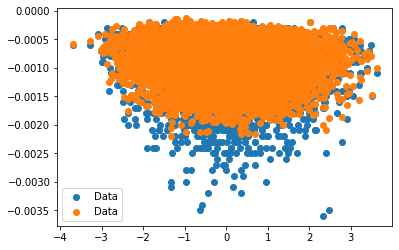

In [ ]:
# Part 2-Question 1: Implementing direct solution of linear regression on training set
import scipy
from sklearn.metrics import mean_squared_error

w = np.dot(np.dot(scipy.linalg.inv(np.dot(final_x_train.T, final_x_train)),final_x_train.T), y_train)

y_pred_train = np.dot(final_x_train, w) # prediction on the training set
y_pred_val = np.dot(final_x_val, w) # prediction on the validation set

RMSE_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
RMSE_val = np.sqrt(mean_squared_error(y_pred_val, y_val))

print ("RMSE on training set (direct solution): " , RMSE_train)
print ("RMSE on validation set(direct solution):" , RMSE_val)

plt.scatter(final_x_train[:,1],y_train,label='Data')
plt.scatter(final_x_train[:,1],y_pred_train,label='Data')
plt.legend()
plt.show


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [ ]:
import time
import random

In [ ]:
# Part 3-Question 1: Record the training time (from the first iteration until convergence)
start_time = time.time() ## Records current time

w_n = np.random.uniform(low=0,high=0.001,size=(41,))
w_n = w_n.reshape(-1,1)

lr = 0.01

t_train3 = y_train
t_val3 = y_val

rmse_train = []
rmse_val = []

for epoch in range(0,5000):
  y_pred_train3 = np.dot(final_x_train,w_n)
  y_pred_val3 = np.dot(final_x_val,w_n)

  rmse_train3 = np.sqrt(mean_squared_error(y_pred_train3,t_train3))
  rmse_val3 = np.sqrt(mean_squared_error(y_pred_val3,t_val3))

  rmse_train.append(rmse_train3)
  rmse_val.append(rmse_val3)

  gt = ((1/len(y_pred_train3))*np.dot((y_pred_train3-t_train3).T,final_x_train))
  w_n = w_n - lr*gt.T

  if rmse_val3 <= 1.001*RMSE_val:
    break


print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 25.209595680236816 (s) ---


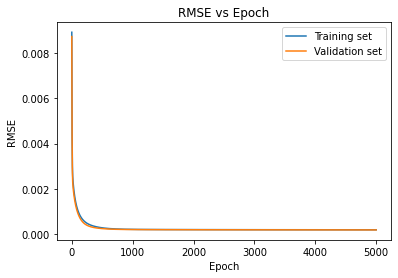

In [ ]:
# Plotting the training RMSE and the validation RMSE vs. epoch
import matplotlib.pyplot as plt
plt.plot(rmse_train,label='Training set')
plt.plot(rmse_val,label='Validation set')
plt.title('RMSE vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

**Part 3 - Question 3:**

The convergence criteria is achieved since the epoch value is close to 200 (given range of 5000).

Overall, the training RMSE is almost same as the validation RMSE (High in initial epochs and drops down after 400 epochs).The epoch value changes since the weights are a set randomly.
The graph is neither overfitted nor underfitted as the Training RMSE curve & validation RMSE curve overlap,hence a complete tradeoff between bias and variance is achieved. The model is overfitted when the validation RMSE is **marginally** greater than the training RMSE.


(However, when the graph is scaled up (unit distance of 0.0001 on y-axis), for less epochs, the model is overfitting, since the training RMSE is near 0.00018, whereas the validation RMSE is 0.0005 (high).)

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
w_x = np.random.uniform(low=0,high=0.001,size=(41,))
w_x = w_x.reshape(-1,1)

In [ ]:
def minibatch(x_train,x_val,y_train,y_val,batch_size,lr,ct):
  start = time.time()
  np.random.seed(1)

  w_x = np.random.uniform(low=0,high=0.001,size=(41,))
  w_x = w_x.reshape(-1,1)

  rmse_train = []
  rmse_val = []

  time_x = []

  for epoch in range(5000):

    t_train_x = y_train
    t_val_x = y_val
    b_size = int(len(final_x_train)/batch_size)
    batch_x_train = np.array_split(final_x_train,b_size)
    batch_y_train = np.array_split(t_train_x,b_size)

    for i in range(int(b_size)):

      y_x = np.dot(batch_x_train[i],w_x)

      gt_x = (1/len(y_x) * np.dot((y_x-batch_y_train[i]).T,batch_x_train[i]))
      w_x = w_x - lr*(gt_x.T)


    final_y_val_pred = np.dot(x_val,w_x)

    rmse_train_x = np.sqrt(mean_squared_error(y_x,batch_y_train[b_size-1]))
    rmse_val_x = np.sqrt(mean_squared_error(final_y_val_pred,t_val_x))

    rmse_train.append(rmse_train_x)
    rmse_val.append(rmse_val_x)

    end = time.time()
    time_x.append(end-start)

    if (rmse_val_x <= ct):
      print(' batch size: {}, Gradient is Converging'.format(batch_size))
      plt.title("Batch Size: {:d}".format(batch_size))
      plt.plot(rmse_train,label='RMSE of training set')
      plt.plot(rmse_val,label='RMSE of validation set')
      plt.xlabel("EPOCH")
      plt.ylabel("RMSE")
      plt.legend()
      plt.show()

      plt.plot(rmse_train,time_x,label='RMSE of training set')
      plt.plot(rmse_val,time_x,label='RMSE of validation set')
      plt.xlabel("Elapsed time")
      plt.ylabel("RMSE")
      plt.legend()
      plt.show()
      return  w_x,rmse_train,rmse_val,time_x
    if rmse_val_x > rmse_val[-2:-1]:
      print("Batch size failed to converge")
      return 0,0,0,0


    perm = np.random.permutation(len(final_x_train))
                              # reference 2
    x_train = final_x_train[perm]
    y_train = y_train.iloc[perm,:]
  #np.random.seed(2)


Batch size failed to converge
Batch size failed to converge
Batch size failed to converge
Batch size failed to converge
Batch size failed to converge
 batch size: 64, Gradient is Converging


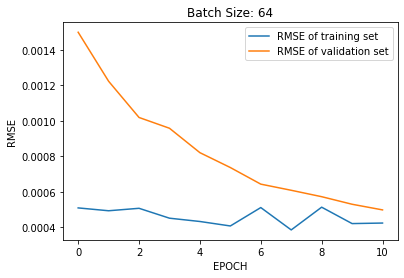

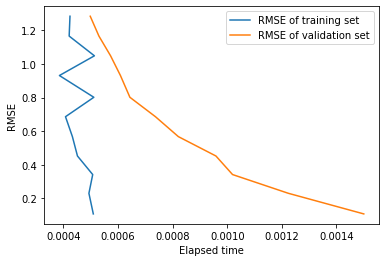

 batch size: 128, Gradient is Converging


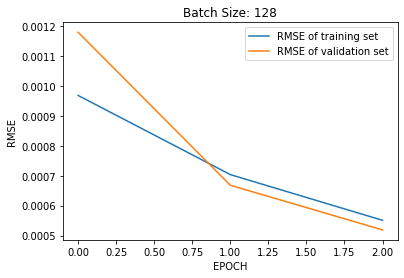

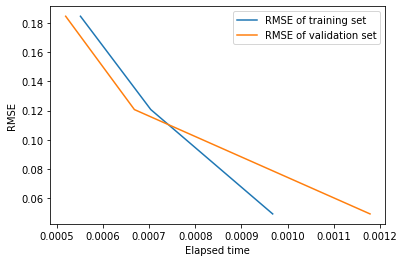

 batch size: 256, Gradient is Converging


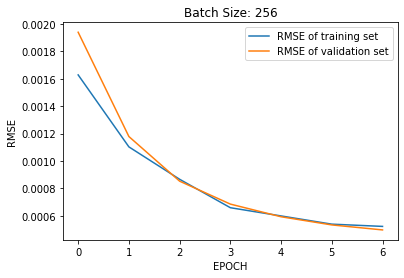

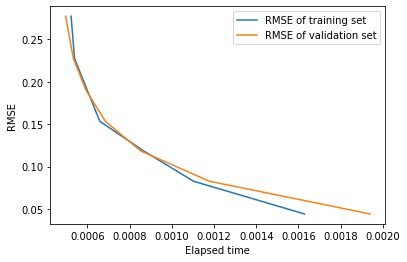

 batch size: 512, Gradient is Converging


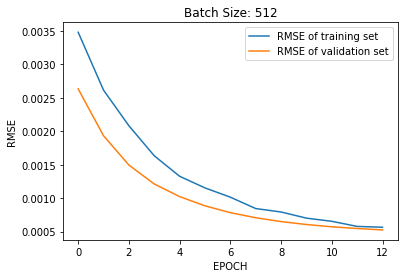

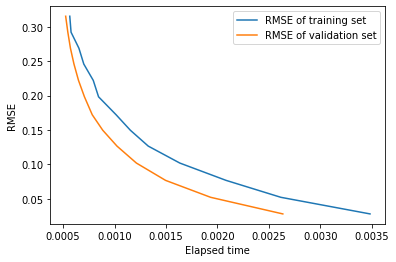

 batch size: 1024, Gradient is Converging


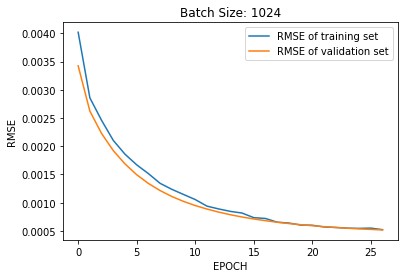

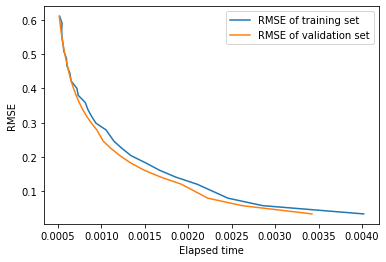

In [ ]:
time_list=[]
b_size = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
for i in b_size:
  w_i,rmse_train_i,rmse_val_i,time_i = minibatch(final_x_train,final_x_val,y_train,y_val,i,0.01,1.001*RMSE_val)
  time_list.append(np.sum(time_i))
time_array = np.array(time_list)
time_array = time_array[np.nonzero(time_array)]

 batch size: 64, Gradient is Converging


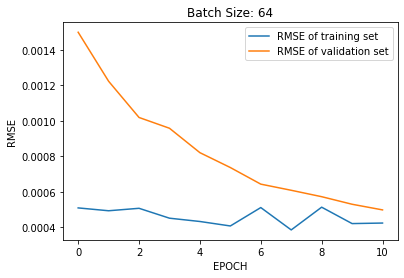

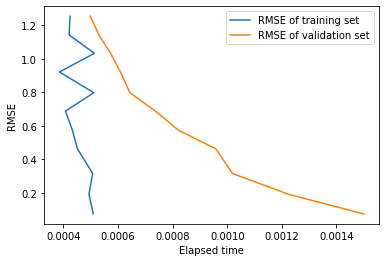

 batch size: 128, Gradient is Converging


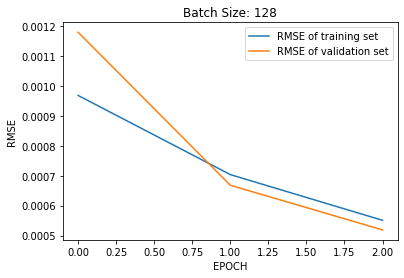

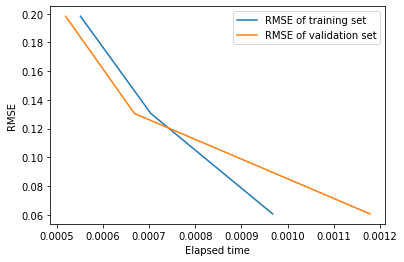

 batch size: 256, Gradient is Converging


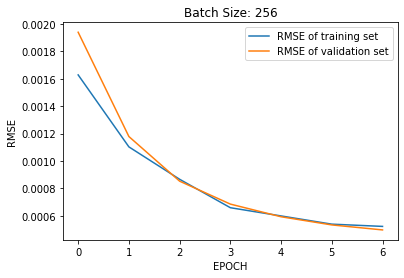

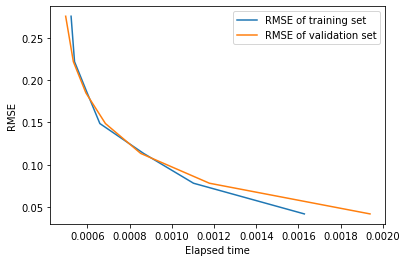

 batch size: 512, Gradient is Converging


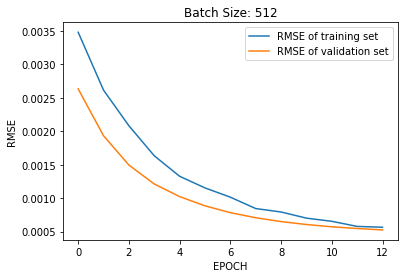

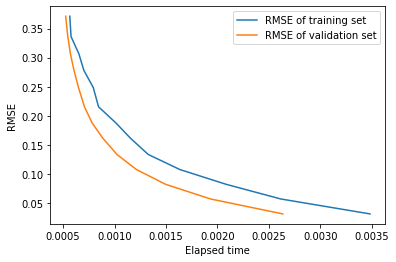

 batch size: 1024, Gradient is Converging


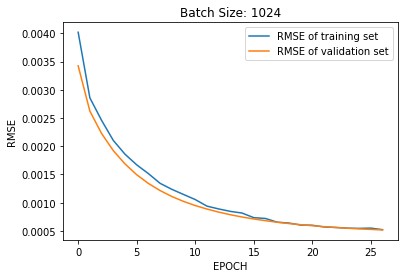

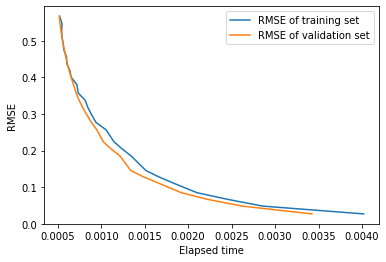

In [ ]:
w_64,rmse_train_64,rmse_val_64,time_64 = minibatch(final_x_train,final_x_val,y_train,y_val,64,0.01,1.001*RMSE_val)
w_128,rmse_train_128,rmse_val_128,time_128 = minibatch(final_x_train,final_x_val,y_train,y_val,128,0.01,1.001*RMSE_val)
w_256,rmse_train_256,rmse_val_256,time_256 = minibatch(final_x_train,final_x_val,y_train,y_val,256,0.01,1.001*RMSE_val)
w_512,rmse_train_512,rmse_val_512,time_512 = minibatch(final_x_train,final_x_val,y_train,y_val,512,0.01,1.001*RMSE_val)
w_1024,rmse_train_1024,rmse_val_1024,time_1024 = minibatch(final_x_train,final_x_val,y_train,y_val,1024,0.01,1.001*RMSE_val)

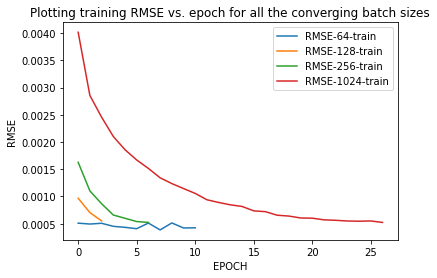

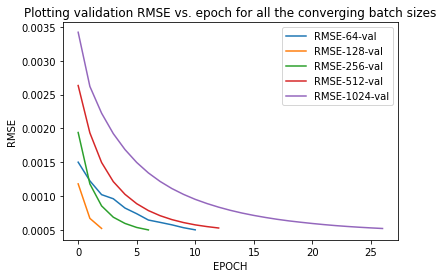

In [ ]:
plt.title("Plotting training RMSE vs. epoch for all the converging batch sizes")
plt.plot(rmse_train_64,label='RMSE-64-train')
plt.plot(rmse_train_128,label='RMSE-128-train')
plt.plot(rmse_train_256,label='RMSE-256-train')
plt.plot(rmse_train_512label='RMSE-512-train')
plt.plot(rmse_train_1024,label='RMSE-1024-train')
plt.xlabel("EPOCH")
plt.ylabel("RMSE")
plt.legend()
plt.show()

plt.title("Plotting validation RMSE vs. epoch for all the converging batch sizes")
plt.plot(rmse_val_64,label='RMSE-64-val')
plt.plot(rmse_val_128,label='RMSE-128-val')
plt.plot(rmse_val_256,label='RMSE-256-val')
plt.plot(rmse_val_512,label='RMSE-512-val')
plt.plot(rmse_val_1024,label='RMSE-1024-val')
plt.xlabel("EPOCH")
plt.ylabel("RMSE")
plt.legend()
plt.show()

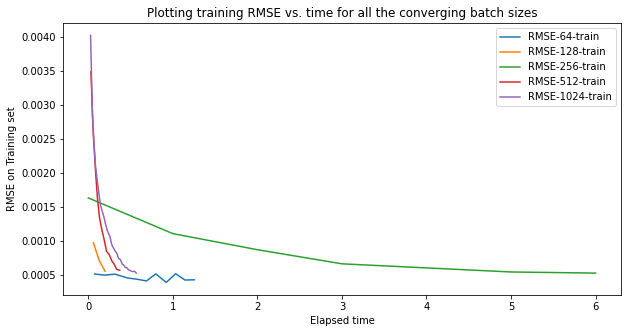

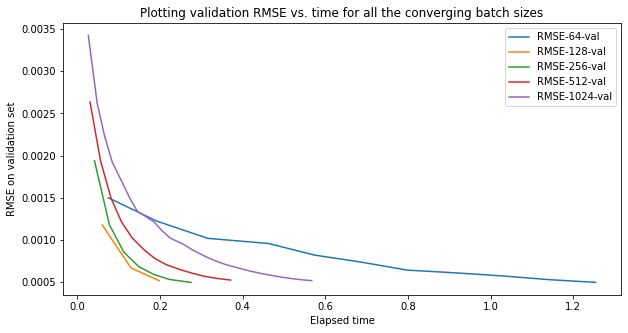

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Plotting training RMSE vs. time for all the converging batch sizes")
plt.plot(time_64,rmse_train_64,label='RMSE-64-train')
plt.plot(time_128,rmse_train_128,label='RMSE-128-train')
plt.plot(rmse_train_256,label='RMSE-256-train')
plt.plot(time_512,rmse_train_512,label='RMSE-512-train')
plt.plot(time_1024,rmse_train_1024,label='RMSE-1024-train')
plt.xlabel("Elapsed time")
plt.ylabel("RMSE on Training set")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.title("Plotting validation RMSE vs. time for all the converging batch sizes")
plt.plot(time_64,rmse_val_64,label='RMSE-64-val')
plt.plot(time_128,rmse_val_128,label='RMSE-128-val')
plt.plot(time_256,rmse_val_256,label='RMSE-256-val')
plt.plot(time_512,rmse_val_512,label='RMSE-512-val')
plt.plot(time_1024,rmse_val_1024,label='RMSE-1024-val')
plt.xlabel("Elapsed time")
plt.ylabel("RMSE on validation set")
plt.legend()
plt.show()

In [ ]:
b_size

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

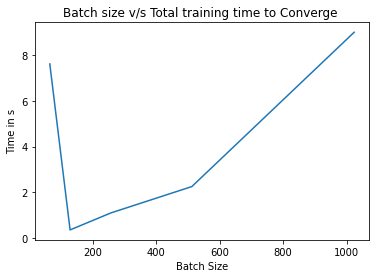

In [ ]:
b = np.array(b_size)
t = time_array
plt.plot(b[5:].reshape(-1,1),t.reshape(-1,1))
plt.title('Batch size v/s Total training time to Converge ')
plt.xlabel("Batch Size")
plt.ylabel("Time in s")
plt.show()

**Part 4**
1) The batch sizes 2,4,8,16,32 failed to converge. However, as we increased the batch size (64,128,512,1024), the model was able to converge successfully to a lower rmse score<br>
2) From the plots for RMSE(training and validaion) vs EPOCH for batch sizes that converged, the RMSE value reduces and reaches a constant value with increase in the number of epochs.<br>
3) From the plot of Batch size vs Total time,  the total training time increases with the increase in batch size. Since the batch size is low, the number of batches is high, hence the number of EPOCHS required is less in order to converge to a low RMSE, hence the training time is less. In contrast to this, since the batch size is high, the number of batches is less, hence the model requires to go through a large number of datapoints in a single batch, thereby increasing the training time.

For low batch sizes (less than 200), the training time is less than 2 seconds. For larger batch sizes > 1000, the total training time increases.

Note: The training time for batch size = 64 is high, since the commands and loops in the function runs before the iteration takes place, due to which the total training time is indicated in the figure is abrupt.

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

 batch size: 8, Gradient is Converging


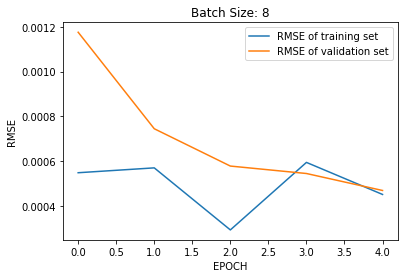

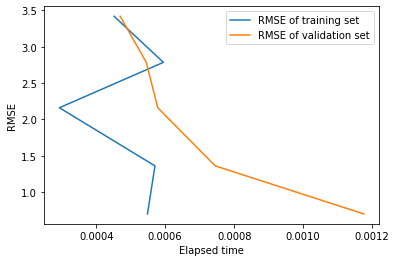

 batch size: 16, Gradient is Converging


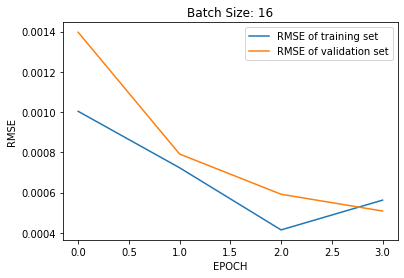

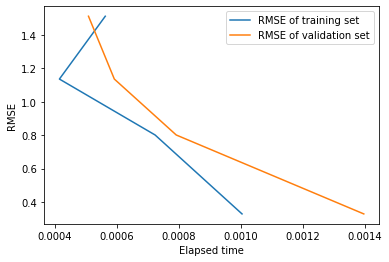

 batch size: 32, Gradient is Converging


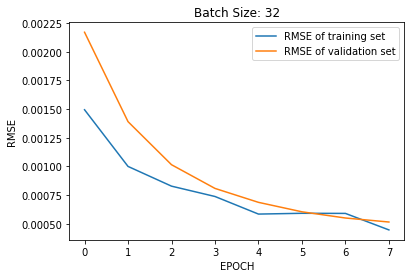

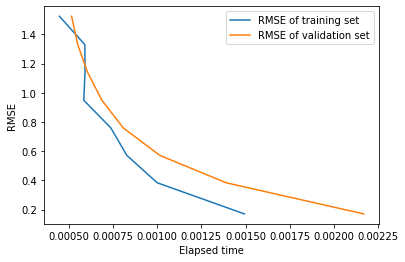

In [ ]:
### YOUR CODE HERE ###
from tabulate import tabulate
b_size = [8, 16, 32]
lr=0.001
rmse_train_conv=[]
rmse_val_conv=[]
for i in b_size:
  w_5,rmse_train_5,rmse_val_5,time_5 = minibatch(final_x_train,final_x_val,y_train,y_val,i,lr,1.001*RMSE_val)
  rmse_train_conv.append(w_5[-1])
  rmse_val_conv.append(rmse_train[-1])                                                ###### Findings are reported in table below the plots

In [ ]:
tabular = [["Batch Size"]+b_size,["Learning Rate"]+[0.001,0.001,0.001],["RMSE on Training set"]+rmse_train_conv,["RMSE on Validation set"]+rmse_val_conv]

print(tabulate(tabular,tablefmt='grid'))

+------------------------+-------------+--------------+--------------+
| Batch Size             | 8           | 16           | 32           |
+------------------------+-------------+--------------+--------------+
| Learning Rate          | 0.001       |  0.001       |  0.001       |
+------------------------+-------------+--------------+--------------+
| RMSE on Training set   | 0.000479669 |  0.000488779 |  0.000488281 |
+------------------------+-------------+--------------+--------------+
| RMSE on Validation set | 0.000184155 |  0.000184155 |  0.000184155 |
+------------------------+-------------+--------------+--------------+


The plot with Learning rate=0.0001 & batch size=64
 batch size: 64, Gradient is Converging


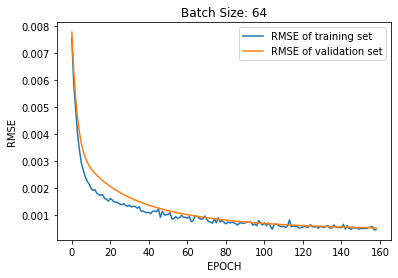

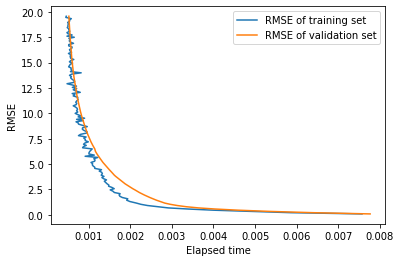

The plot with Learning rate=0.0002 & batch size=64
 batch size: 64, Gradient is Converging


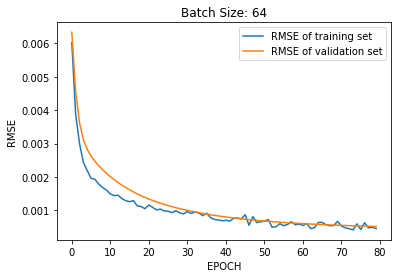

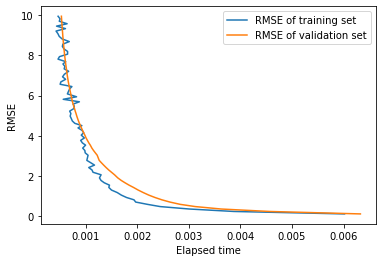

The plot with Learning rate=0.00030000000000000003 & batch size=64
 batch size: 64, Gradient is Converging


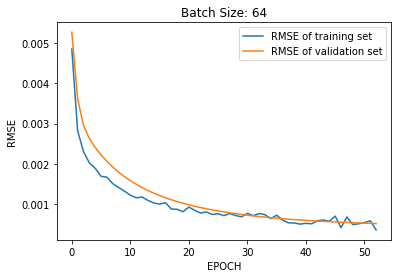

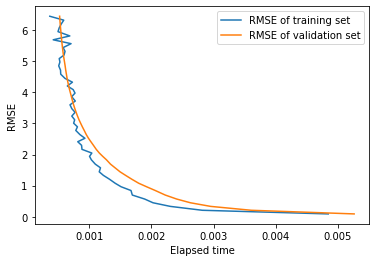

The plot with Learning rate=0.0004 & batch size=64
 batch size: 64, Gradient is Converging


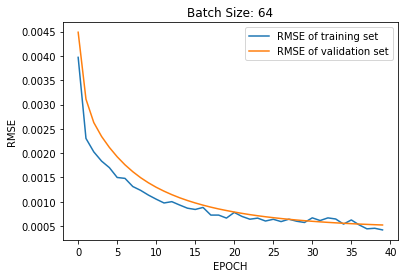

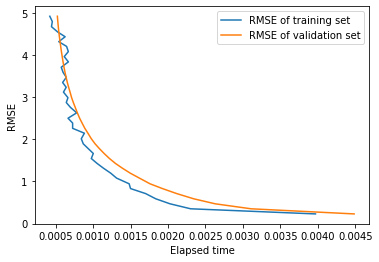

The plot with Learning rate=0.0005 & batch size=64
 batch size: 64, Gradient is Converging


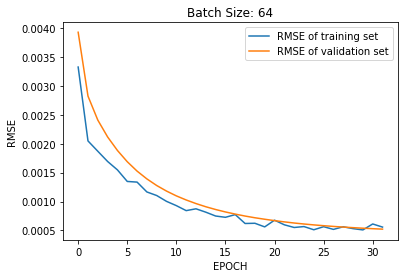

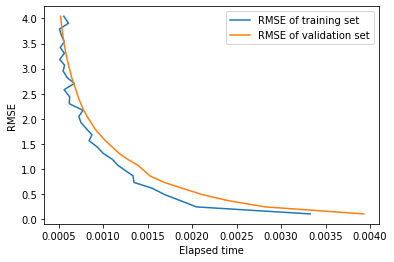

The plot with Learning rate=0.0006000000000000001 & batch size=64
 batch size: 64, Gradient is Converging


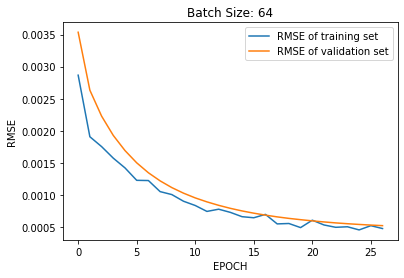

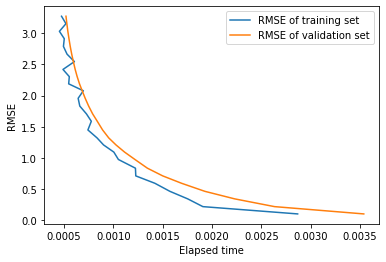

The plot with Learning rate=0.0007000000000000001 & batch size=64
 batch size: 64, Gradient is Converging


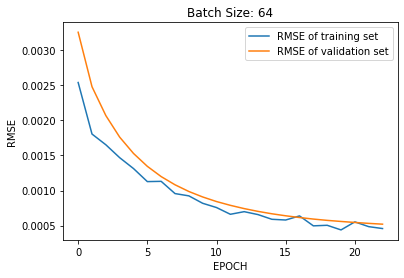

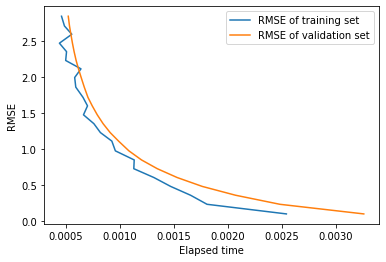

The plot with Learning rate=0.0008 & batch size=64
 batch size: 64, Gradient is Converging


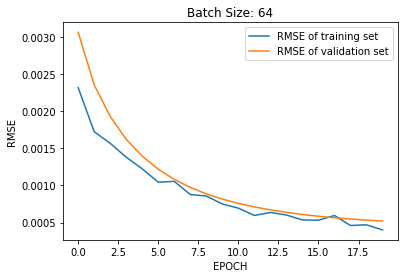

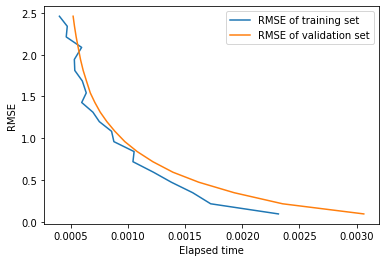

The plot with Learning rate=0.0009000000000000001 & batch size=64
 batch size: 64, Gradient is Converging


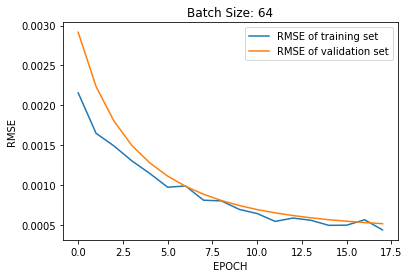

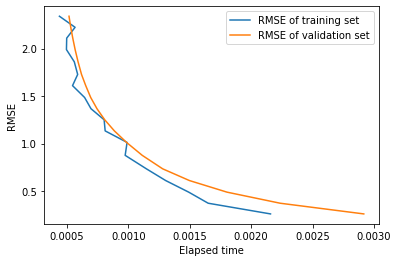

The plot with Learning rate=0.001 & batch size=64
 batch size: 64, Gradient is Converging


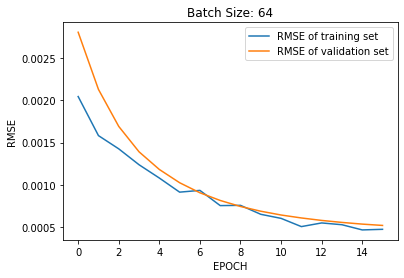

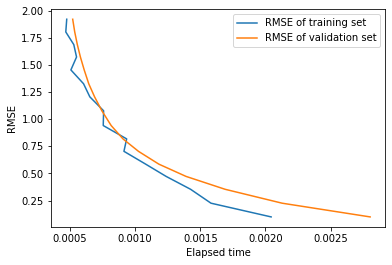

In [ ]:
for i in np.arange(0.0001,0.0011,0.0001):
  batch_size=64
  print('The plot with Learning rate={} & batch size={}'.format(i,batch_size))
  w_5b,rmse_train_5b,rmse_val_5b,time_5b = minibatch(final_x_train,final_x_val,y_train,y_val,batch_size,i,1.001*RMSE_val)


**Part 5**
1) From the above plots for RMSE against time, when we increase the learning rate by a step of 0.0001, the RMSE for the train and validation set decreases. <br>
2) When we use a low learning rate, we are able to converge to lower RMSE with low batch size i.e., 8,16 and 32. <br>
3) The elapsed time reduces as the learning rate is increased which means that the total training time is reduced for as the learning rates increase.

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set.

Briefly describe your model selections/settings. **[0.5]**

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]**

 batch size: 64, Gradient is Converging


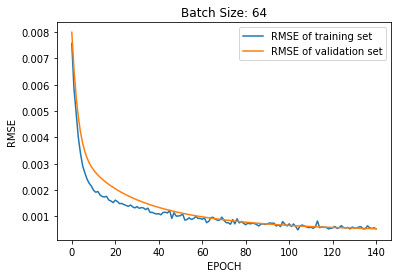

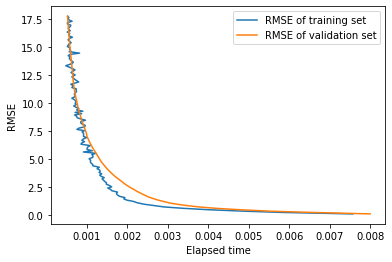

In [ ]:
### I chose the mini batch gradient descent with a batch size of 64 and the following learning rates.
test_batch_size = 64
test_lr = 0.0001

w_test,rmse_train_test,rmse_val_test,time_test = minibatch(final_x_train,final_x_test,y_train,y_test,test_batch_size,test_lr,1.001*RMSE_val)


While comparing the rmse score achieved using Direct solution, full batch and mini batch gradient descent, the model performs better using mini batch gradient descent than full batch due to following reasons:

*   Mini batch showed less RMSE error compared to gradient descent (0.0004 v/s 0.000525)
*   Mini batch method uses less number of epochs to converge
*   Less training time

To summarize, the model performs good on a training batch size of 64 using mini batch gradient descent, since the RMSE achieevd is very low and the computational time (TIme complexity is less). In addition, the EPOCHs are low when one compares the model with full batch gradient descent and the model is able to capture the variance/bias of the dataset, hence being able to predict the target dataset.

**Private Repository Link : <font color='red'>** **--FILL HERE---**</https://github.com/APS-1070-2021/f22-project4-git-riyanroy9698>